In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
configs=['AverageRadiusofGyration','MeanEnd-To-EndDistanceofChains']
beads_range=[x for x in range(10,50,4) if x not in (38,46)]
fracs_range=[x/100 for x in range(0,100,25) if x!=0]
denss_range=[x/100 for x in range(0,81,5) if x>0]

In [3]:
columns=[]
with open('configs/configurations_of_10_beads.txt','r') as raw:
    cols=raw.readline()
    cols=cols.replace('|',',')
    cols=cols.replace(' ','')
    cols=cols.replace('\n','')
    for i in cols.split(','):
        columns.append(i)

In [4]:
def Data(bead):
    file = pd.read_csv('configs/configurations_of_'+str(bead)+'_beads.txt', sep='|')
    file.columns = columns
    return file

In [5]:
def Grapher1(Fracs, Beads, Dens, Config):
    Fracs.reverse()
    for Frac in Fracs:
        data = []
        for Bead in Beads:
            data.append(Data(Bead).query('RealFracPhobic == '+str(int(Bead*(1-Frac))))[Config])
        
        x=Dens
        
        y0=data[0]; plt.plot(x,y0,label='10 beads'); 
        y1=data[1]; plt.plot(x,y1,label='14 beads'); 
        y2=data[2]; plt.plot(x,y2,label='18 beads');
        y3=data[3]; plt.plot(x,y3,label='22 beads');
        y4=data[4]; plt.plot(x,y4,label='26 beads');
        y5=data[5]; plt.plot(x,y5,label='30 beads');
        y6=data[6]; plt.plot(x,y6,label='34 beads');
        y7=data[7]; plt.plot(x,y7,label='42 beads');
        
        plt.xlabel("Density"); plt.ylabel(Config)
        plt.legend(loc=0, ncol=1); plt.title("polymers with $f_{A}$ ~ "+str(int((1-Frac)*10%10)))
        plt.savefig("results/configuration/"+str(Config)+"_f-"+str(int((1-Frac)*10%10))+".png")
        plt.show()

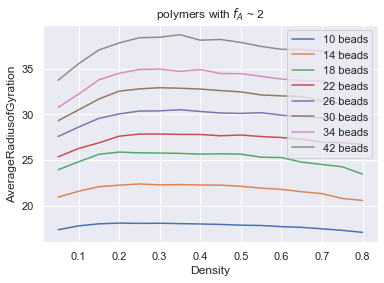

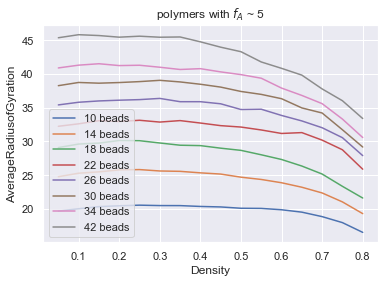

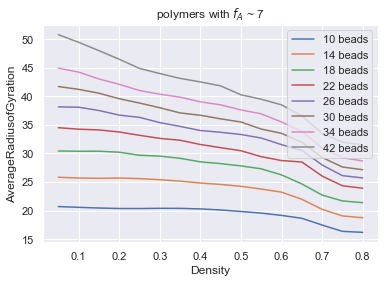

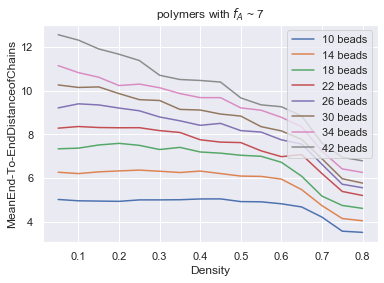

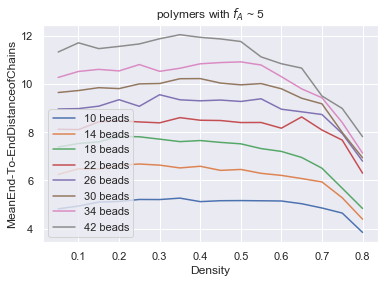

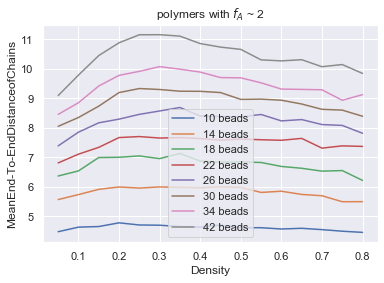

In [6]:
for config in configs:
    Grapher1(fracs_range, beads_range, denss_range, config)